## Exercício de Regressão Múltipla – Happiness Dataset

O banco de dados “happiness.xls” contém dados de grau de felicidade de 122 países.
Objetivo: prever o escore de felicidade com base nas variáveis:
- Hemisfério
- HDI
- GDP per capita
- Consumo de cerveja, álcool e vinho per capita

In [ ]:
# Importando pacotes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from scipy.stats import shapiro
!pip install statsmodels
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
# Importando base 
df = pd.read_excel("C:\\Users\\Gabi\\Documents\\GitHub\\portfolio-ml\\reg_multipla\\p38a.xlsx")  # ou o caminho do seu arquivo

df.head()

,ID,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO
0,SI_01,SECUNDÁRIO,GERENTE,INTERIOR,30,1,4279.5
1,SI_02,SUPERIOR,AUXILIAR,INTERIOR,32,4,4575.4
2,SI_03,SECUNDÁRIO,AUXILIAR,CAPITAL,33,2,4735.6
3,SI_04,SUPERIOR,GERENTE,INTERIOR,34,3,4863.1
4,SI_05,SECUNDÁRIO,GERENTE,INTERIOR,36,1,5355.8


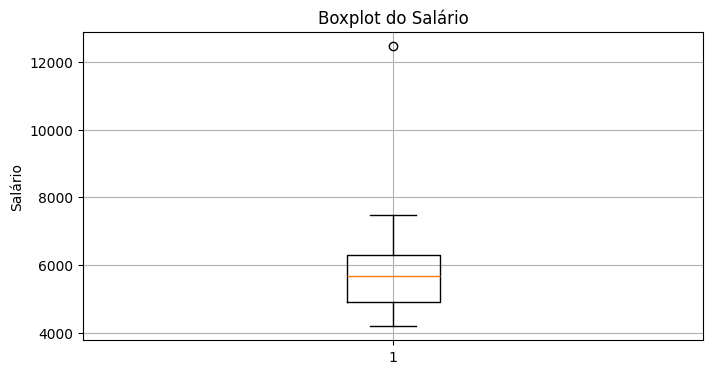

In [157]:
# Verificando existencia de outliers
plt.figure(figsize=(8, 4))
plt.boxplot(df['SALARIO'])
plt.title("Boxplot do Salário")
plt.ylabel("Salário")
plt.grid(True)
plt.show()


Q1 = df['SALARIO'].quantile(0.25)
Q3 = df['SALARIO'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['SALARIO'] >= limite_inferior) & (df['SALARIO'] <= limite_superior)]



In [158]:
# Garantir que os nomes das colunas não tenham espaços extras e sejam consistentes
df.columns = df.columns.str.strip().str.upper()

# Criando variáveis dummy para variáveis categóricas
df['educacaoSUPERIOR'] = df['EDUCAÇÃO'].apply(lambda x: 1 if x.upper() == 'SUPERIOR' else 0)
df['cargoDIRETOR'] = df['CARGO'].apply(lambda x: 1 if x.upper() == 'DIRETOR' else 0)
df['cargoGERENTE'] = df['CARGO'].apply(lambda x: 1 if x.upper() == 'GERENTE' else 0)
df['localINTERIOR'] = df['LOCAL'].apply(lambda x: 1 if x.upper() == 'INTERIOR' else 0)


df.head()

,ID,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO,EDUCACAOSUPERIOR,CARGODIRETOR,CARGOGERENTE,LOCALINTERIOR,educacaoSUPERIOR,cargoDIRETOR,cargoGERENTE,localINTERIOR
0,SI_01,SECUNDÁRIO,GERENTE,INTERIOR,30,1,4279.5,0,0,1,1,0,0,1,1
1,SI_02,SUPERIOR,AUXILIAR,INTERIOR,32,4,4575.4,1,0,0,1,1,0,0,1
2,SI_03,SECUNDÁRIO,AUXILIAR,CAPITAL,33,2,4735.6,0,0,0,0,0,0,0,0
3,SI_04,SUPERIOR,GERENTE,INTERIOR,34,3,4863.1,1,0,1,1,1,0,1,1
4,SI_05,SECUNDÁRIO,GERENTE,INTERIOR,36,1,5355.8,0,0,1,1,0,0,1,1


In [ ]:
# Separar variável x e y
# Variável dependente (y) e independentes (X)
X = df[['IDADE', 'TEMPOCASA', 'educacaoSUPERIOR', 'cargoDIRETOR', 'cargoGERENTE', 'localINTERIOR']]
y = df['SALARIO']

In [ ]:
# Dividir em treino e teste
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
# Criar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prever e avaliar o modelo
# Fazer previsão diretamente com o modelo treinado
y_pred = modelo.predict(X_test)

# Calcular métricas de avaliação 
# Calcular MAE, MSE e R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ============================================================
# 🎯 INTERPRETAÇÃO DAS MÉTRICAS DE AVALIAÇÃO DO MODELO
# ============================================================

# MAE (Mean Absolute Error – Erro Absoluto Médio)
# → Mede, em média, quanto o modelo erra para mais ou para menos.
# → Interpretação direta: "O modelo erra em média R$ X por previsão."
# → Quanto menor o MAE, melhor o desempenho do modelo.

# MSE (Mean Squared Error – Erro Quadrático Médio)
# → Eleva os erros ao quadrado antes de calcular a média.
# → Isso penaliza mais os erros grandes (outliers).
# → Quanto menor o MSE, melhor. Útil para comparar entre modelos.

# R² (Coeficiente de Determinação)
# → Mede o quanto do valor da variável dependente (ex: salário) 
#   é explicado pelas variáveis independentes do modelo.
# → Varia de 0 a 1. Ex: R² = 0.82 significa que 82% da variação do salário 
#   é explicada pelo modelo. 
# → Quanto mais próximo de 1, melhor.

# Exibir resultados

def avaliar_modelo(modelo, X_teste, y_teste):
    """
    Avalia o desempenho do modelo de regressão com base em MAE, MSE e R².
    Imprime as métricas com interpretações automáticas.
    """
    # Fazer previsão diretamente com o modelo treinado
    y_pred = modelo.predict(X_teste)

    # Calcular métricas
    mae = mean_absolute_error(y_teste, y_pred)
    mse = mean_squared_error(y_teste, y_pred)
    r2 = r2_score(y_teste, y_pred)

    # Exibir resultados
    print("\n📊 Avaliação do Modelo de Regressão\n")

    print(f"➡️ MAE (Erro Absoluto Médio): {round(mae, 2)}")
    print("   → Em média, o modelo erra por cerca de R$ {:.2f} no valor do salário.".format(mae))

    print(f"\n➡️ MSE (Erro Quadrático Médio): {round(mse, 2)}")
    print("   → Mede o erro médio ao quadrado. Quanto menor, melhor.")

    print(f"\n➡️ R² (Coeficiente de Determinação): {round(r2, 2)}")
    print("   → O modelo explica {:.0%} da variação do salário.".format(r2))

    return {"MAE": mae, "MSE": mse, "R2": r2}

avaliar_modelo(modelo, X_test, y_test)



📊 Avaliação do Modelo de Regressão

➡️ MAE (Erro Absoluto Médio): 329.72
   → Em média, o modelo erra por cerca de R$ 329.72 no valor do salário.

➡️ MSE (Erro Quadrático Médio): 134164.66
   → Mede o erro médio ao quadrado. Quanto menor, melhor.

➡️ R² (Coeficiente de Determinação): 0.82
   → O modelo explica 82% da variação do salário.


{'MAE': 329.71708920323795, 'MSE': 134164.6618218816, 'R2': 0.819927713172789}

In [163]:
# O modelo
# Exibir fórmula do modelo com todos os coeficientes
coeficientes = dict(zip(X.columns, modelo.coef_))
for nome, valor in coeficientes.items():
    print(f"{nome}: {valor:.4f}")
print(f"Intercepto: {modelo.intercept_:.2f}")

IDADE: 19.1446
TEMPOCASA: 71.7438
educacaoSUPERIOR: 85.1645
cargoDIRETOR: 661.7416
cargoGERENTE: 381.7678
localINTERIOR: 81.7110
Intercepto: 3642.93


✅ Normalidade (Shapiro-Wilk): estatística = 0.9228, p-valor = 0.1872
✅ Independência dos erros (Durbin-Watson): 1.2393


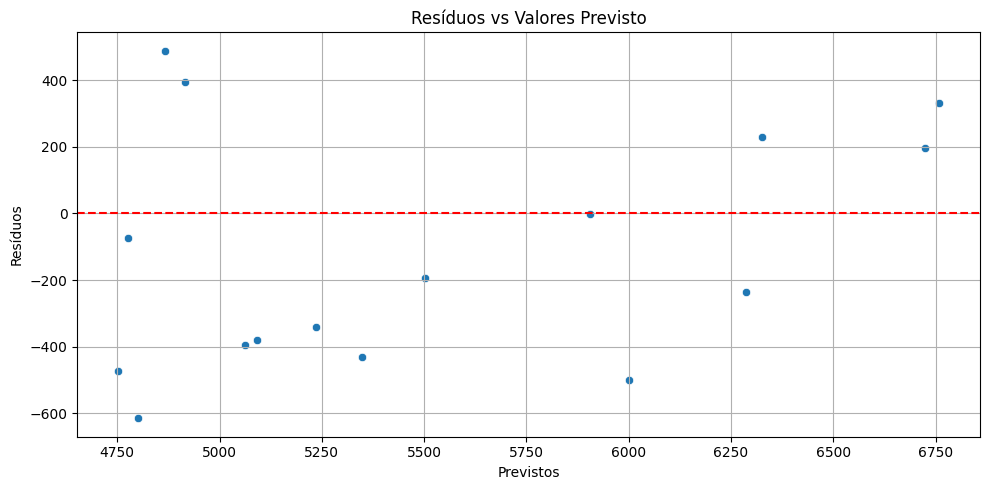

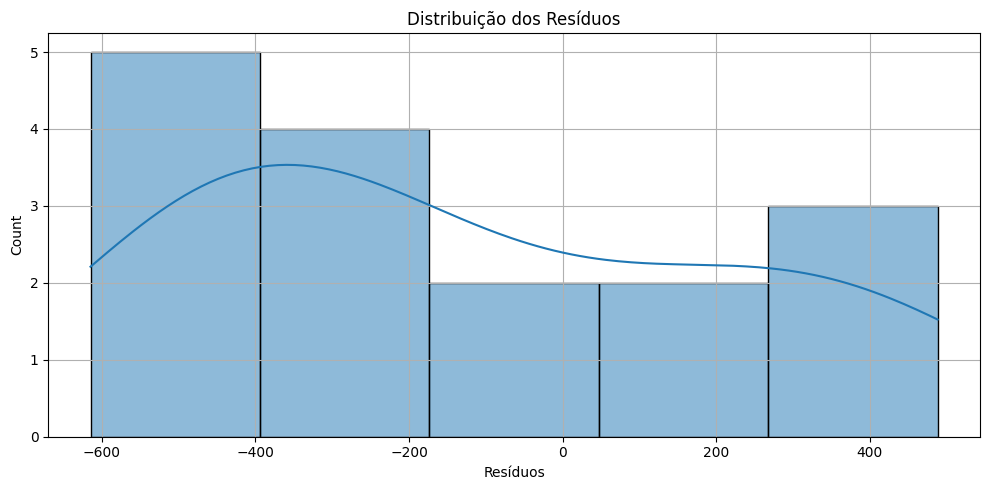

In [ ]:
# Testes 

# ==============================================================
# 🧪 ANÁLISE DE RESÍDUOS — Para verificar se o modelo é confiável
# ==============================================================

# ✔️ 1. Teste de Normalidade (Shapiro-Wilk)
# → Verifica se os erros (resíduos) seguem uma distribuição normal.
# → O ideal é que o p-valor seja MAIOR que 0.05.
# → Se for maior, isso indica que os erros estão bem distribuídos.


# ✔️ 2. Teste de Independência dos Erros (Durbin-Watson)
# → Verifica se os erros estão "dependendo uns dos outros".
# → O valor ideal fica entre 1.5 e 2.5.


# 📈 3. Gráfico: Resíduos vs Valores Previsto
# → Cada ponto representa um erro do modelo.
# → Esperamos que os pontos estejam espalhados aleatoriamente.
# → Se houver desenho (curva, funil, etc.), o modelo pode estar com problemas.

# 📊 4. Gráfico: Distribuição dos Resíduos (Histograma ou KDE)
# → Mostra a “cara” da distribuição dos erros.
# → Queremos que pareça um sino (como a curva normal).
# → Se estiver muito torto ou achatado, o modelo pode estar com resíduos ruins.


def verificar_suposicoes(modelo, X_test, y_test):
    # Previsões e resíduos
    y_pred = modelo.predict(X_test)
    residuos = y_test - y_pred

    # Teste de normalidade
    estat, p = shapiro(residuos)
    print(f"✅ Normalidade (Shapiro-Wilk): estatística = {estat:.4f}, p-valor = {p:.4f}")

    # Teste de independência
    dw = durbin_watson(residuos)
    print(f"✅ Independência dos erros (Durbin-Watson): {dw:.4f}")

    # Gráfico de homocedasticidade
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Resíduos vs Valores Previsto")
    plt.xlabel("Previstos")
    plt.ylabel("Resíduos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Histograma dos resíduos
    plt.figure(figsize=(10, 5))
    sns.histplot(residuos, kde=True)
    plt.title("Distribuição dos Resíduos")
    plt.xlabel("Resíduos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

verificar_suposicoes(modelo, X_test, y_test)

# ============================================================
# 🧪 VERIFICAÇÃO DE CONFIABILIDADE DO MODELO — linguagem simples
# ============================================================

# Quando usamos um modelo para prever salários, por exemplo,
# ele comete pequenos erros — esses erros se chamam "resíduos".

# Antes de confiar 100% no modelo, precisamos verificar se:
# 1) Os erros estão bem distribuídos (sem padrões suspeitos)
# 2) Eles não estão "contaminando" uns aos outros
# 3) O modelo não está favorecendo nem prejudicando certos perfis

# ✔️ 1. Normalidade dos erros
# → Queremos que os erros pareçam aleatórios, como se tivessem sido sorteados.
# → No nosso teste, os erros passaram nesse critério! ✅

# ✔️ 2. Independência dos erros
# → Os erros de uma previsão não podem influenciar os outros.
# → Isso garante que o modelo seja justo com todos os casos.
# → O nosso teste mostrou que os erros estão quase totalmente independentes. Quase lá! ✅

# 📈 3. Gráfico: Erros vs Previsões
# → Esse gráfico mostra se o modelo está errando de forma sistemática.
# → Se os pontos estiverem muito agrupados ou em forma de curva, é sinal de problema.
# → No nosso caso, os erros estão razoavelmente bem espalhados. 👍

# 📊 4. Gráfico da distribuição dos erros
# → Mostra se os erros estão mais concentrados em certas faixas de salário.
# → Queremos uma distribuição equilibrada (forma de sino).
# → Nosso gráfico mostra que os erros estão bem comportados.

# ✅ Conclusão geral:
# O modelo está se comportando bem e **pode ser usado para tomar decisões com confiança**,
# desde que a interpretação leve em conta uma margem média de erro.



In [ ]:
# 7. Adicionar constante (intercepto)
X = sm.add_constant(X)

# 8. Criar e treinar o modelo
modelo = sm.OLS(y, X).fit()

# 9. Mostrar resumo com coeficientes, p-valores, R² etc.
print(modelo.summary())


# ============================================================
# 📊 INTERPRETANDO OS RESULTADOS DO MODELO DE REGRESSÃO
# ============================================================

# 1. R-squared (R² = 0.831)
# → Mostra o quanto o modelo consegue "explicar" o salário com as variáveis que usamos.
# → Aqui, 83,1% da variação no salário é explicada por idade, tempo de casa, cargo etc.
# → Quanto mais próximo de 1 (ou 100%), melhor.

# 2. Adj. R-squared (Ajustado = 0.817)
# → Uma versão ajustada do R², que corrige o valor se tivermos muitas variáveis.
# → Ainda assim, continua excelente — mostra que as variáveis realmente ajudam a explicar o salário.

# 3. Prob (F-statistic) = 7.62e-26
# → Verifica se o modelo como um todo é significativo.
# → p-valor praticamente zero → o modelo é confiável e estatisticamente forte. ✅

# 4. Coef (coeficientes de cada variável)
# → Dizem o quanto cada variável influencia o salário.
# → Exemplo:
#   - TEMPOCASA = 75.01 → a cada ano na empresa, o salário aumenta R$75.
#   - cargoDIRETOR = 737.07 → quem é diretor ganha R$737 a mais, em média.
#   - IDADE = 18.69 → cada ano de idade adiciona cerca de R$19 no salário.

# 5. P>|t| (p-valor de cada variável)
# → Indica se essa variável é importante mesmo ou só "parece ser".
# → Se for menor que 0.05, consideramos importante. ✅
# → No seu modelo, são significativas:
#    - IDADE (p = 0.013)
#    - TEMPOCASA (p < 0.000)
#    - cargoDIRETOR (p < 0.000)
#    - cargoGERENTE (p = 0.000)

# 6. Constante (const = 3547.18)
# → É o salário base quando todas as variáveis são zero (apenas referência matemática).


                            OLS Regression Results                            
Dep. Variable:                SALARIO   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     59.07
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           7.62e-26
Time:                        16:46:12   Log-Likelihood:                -574.69
No. Observations:                  79   AIC:                             1163.
Df Residuals:                      72   BIC:                             1180.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3547.1846    300.270  

In [179]:
def analisar_variaveis_com_interpretacao(modelo, alpha=0.05):
    """
    Analisa a significância e interpreta os coeficientes de um modelo statsmodels.
    """
    print(f"\n📊 Análise de Significância e Interpretação (nível = {alpha})\n")
    
    pvalores = modelo.pvalues
    coeficientes = modelo.params

    for var in pvalores.index:
        p = pvalores[var]
        beta = coeficientes[var]

        # Status de significância
        if p < alpha:
            status = "✅ SIGNIFICANTE"
        else:
            status = "❌ NÃO significante"

        # Interpretação geral
        if var == 'const':
            interpretacao = "Valor base do salário com todas as variáveis zeradas."
        elif var == 'IDADE':
            interpretacao = f"Cada ano de idade aumenta o salário em R${beta:.2f} (mantendo o resto fixo)."
        elif var == 'TEMPOCASA':
            interpretacao = f"Cada ano a mais na empresa aumenta o salário em R${beta:.2f}."
        elif var == 'educacaoSUPERIOR':
            interpretacao = f"Pessoas com ensino superior ganham R${beta:.2f} a mais do que as com ensino secundário."
        elif var == 'cargoDIRETOR':
            interpretacao = f"Diretores ganham em média R${beta:.2f} a mais do que o cargo base (ex: auxiliar)."
        elif var == 'cargoGERENTE':
            interpretacao = f"Gerentes ganham R${beta:.2f} a mais do que o cargo base."
        elif var == 'localINTERIOR':
            interpretacao = f"Quem trabalha no interior ganha R${beta:.2f} a mais do que quem está na capital."
        else:
            interpretacao = f"Coeficiente de {beta:.2f}, verificar contexto da variável."

        print(f"{status} — '{var}' (p = {p:.4f}, β = {beta:.2f})\n→ {interpretacao}\n")


analisar_variaveis_com_interpretacao(modelo)



📊 Análise de Significância e Interpretação (nível = 0.05)

✅ SIGNIFICANTE — 'const' (p = 0.0000, β = 3547.18)
→ Valor base do salário com todas as variáveis zeradas.

✅ SIGNIFICANTE — 'IDADE' (p = 0.0126, β = 18.69)
→ Cada ano de idade aumenta o salário em R$18.69 (mantendo o resto fixo).

✅ SIGNIFICANTE — 'TEMPOCASA' (p = 0.0000, β = 75.01)
→ Cada ano a mais na empresa aumenta o salário em R$75.01.

❌ NÃO significante — 'educacaoSUPERIOR' (p = 0.2398, β = 128.20)
→ Pessoas com ensino superior ganham R$128.20 a mais do que as com ensino secundário.

✅ SIGNIFICANTE — 'cargoDIRETOR' (p = 0.0000, β = 737.07)
→ Diretores ganham em média R$737.07 a mais do que o cargo base (ex: auxiliar).

✅ SIGNIFICANTE — 'cargoGERENTE' (p = 0.0004, β = 345.07)
→ Gerentes ganham R$345.07 a mais do que o cargo base.

❌ NÃO significante — 'localINTERIOR' (p = 0.1442, β = 139.28)
→ Quem trabalha no interior ganha R$139.28 a mais do que quem está na capital.



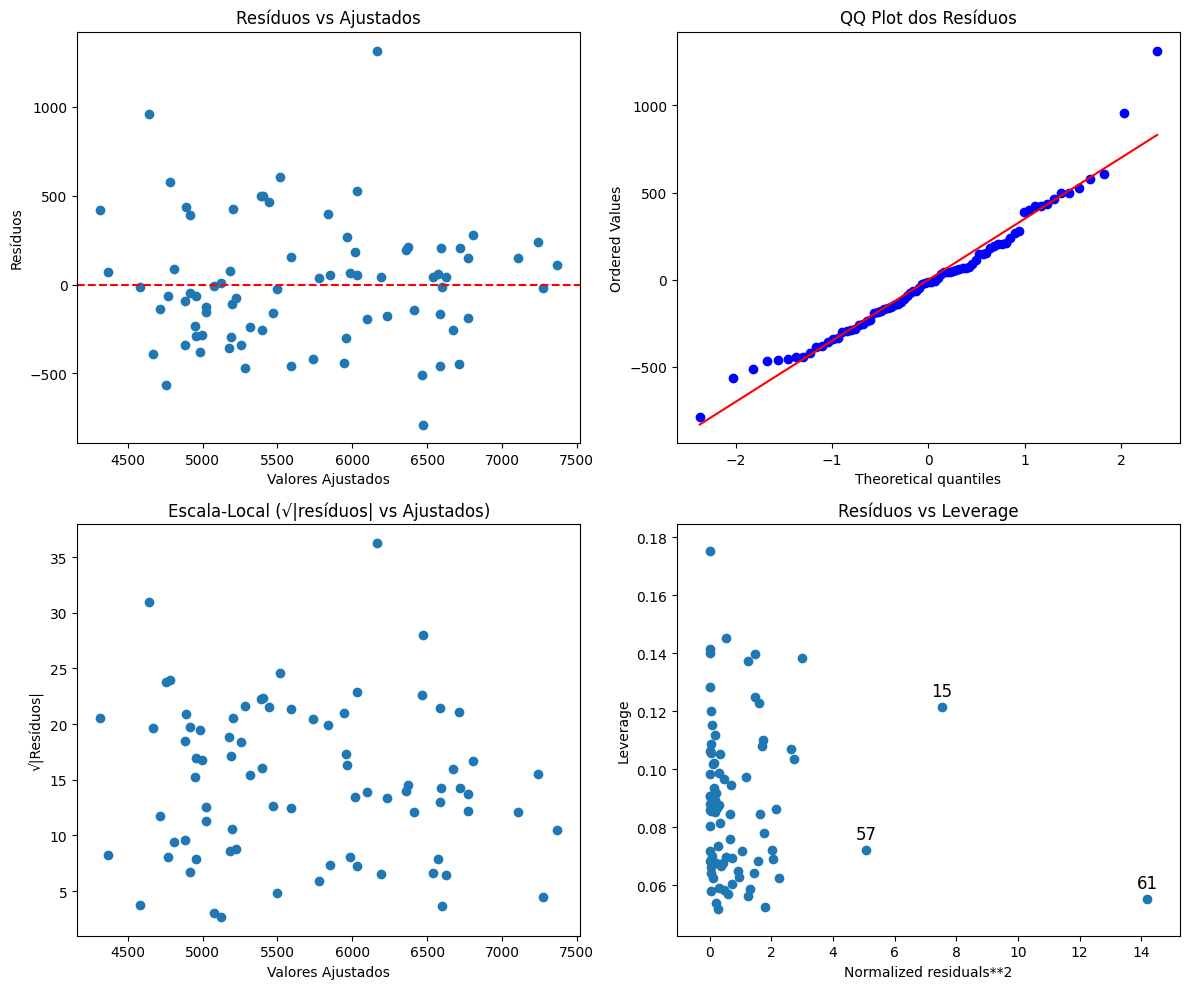

In [ ]:
from scipy import stats

# ============================================================
# 🧾 1. Calcular os resíduos e os valores ajustados pelo modelo
# ============================================================
# → Resíduos = diferença entre o valor real e o valor previsto
# → Ajustados = valores que o modelo previu para os dados de treino
residuos = modelo.resid
ajustados = modelo.fittedvalues

# ============================================================
# 🖼️ 2. Preparar uma grade 2x2 para exibir 4 gráficos diagnósticos
# ============================================================
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# ============================================================
# 📈 Gráfico 1: Resíduos vs Ajustados
# ============================================================
# → Mostra se os erros estão distribuídos aleatoriamente
# → Ideal: pontos espalhados sem formar padrões (ex: curva, funil, linha)
axs[0, 0].scatter(ajustados, residuos)
axs[0, 0].axhline(0, color='red', linestyle='--')
axs[0, 0].set_title("Resíduos vs Ajustados")
axs[0, 0].set_xlabel("Valores Ajustados")
axs[0, 0].set_ylabel("Resíduos")

# ============================================================
# 📊 Gráfico 2: QQ Plot — Verifica a Normalidade dos Resíduos
# ============================================================
# → Compara os resíduos com uma distribuição normal teórica
# → Ideal: pontos devem seguir a linha reta do gráfico
stats.probplot(residuos, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("QQ Plot dos Resíduos")

# ============================================================
# 📉 Gráfico 3: Escala-Local (√|resíduos| vs ajustados)
# ============================================================
# → Verifica se a variância dos erros é constante (homocedasticidade)
# → Ideal: os pontos devem formar uma “nuvem” uniforme
axs[1, 0].scatter(ajustados, np.sqrt(np.abs(residuos)))
axs[1, 0].set_title("Escala-Local (√|resíduos| vs Ajustados)")
axs[1, 0].set_xlabel("Valores Ajustados")
axs[1, 0].set_ylabel("√|Resíduos|")

# ============================================================
# 🔎 Gráfico 4: Resíduos vs Leverage (influência dos pontos)
# ============================================================
# → Verifica se algum ponto tem influência excessiva no modelo
# → Ideal: poucos ou nenhum ponto com alto "leverage"
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(modelo, ax=axs[1, 1])
axs[1, 1].set_title("Resíduos vs Leverage")

# ============================================================
# ✔️ Ajuste final do layout e exibição dos gráficos
# ============================================================
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ============================================================
# 🧪 ANALISAR MULTICOLINEARIDADE COM VIF
# ============================================================

# 📌 O QUE É MULTICOLINEARIDADE?
# → Acontece quando duas ou mais variáveis estão muito correlacionadas entre si.
# → Isso é um problema porque o modelo "não sabe" qual variável realmente está explicando o resultado.
# → Ex: idade e tempo de casa podem crescer juntos — o modelo pode se confundir.

# 📌 O QUE É VIF?
# → VIF mede o quanto a variância (a confiança) de um coeficiente está sendo inflada por conta da correlação com outras variáveis.
# → Em resumo, mostra se uma variável está "repetindo a informação" de outra.

# REGRAS GERAIS:
# - VIF ≈ 1: sem multicolinearidade ✅
# - VIF > 5: atenção ⚠️
# - VIF > 10: problema sério! 🚨

# ============================================================
# 1. Selecionar as variáveis independentes (as mesmas do modelo)
# ============================================================
X = df[['IDADE', 'TEMPOCASA', 'educacaoSUPERIOR', 'cargoDIRETOR', 'cargoGERENTE', 'localINTERIOR']]

# ============================================================
# 2. Adicionar constante (intercepto) como no modelo
# ============================================================
X_const = sm.add_constant(X)

# ============================================================
# 3. Calcular o VIF de cada variável
# ============================================================
# → Para cada variável, o VIF vai mostrar o "quanto ela repete informações das outras"
vif_dados = pd.DataFrame()
vif_dados['Variável'] = X_const.columns
vif_dados['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# ============================================================
# 4. Mostrar os resultados em tabela
# ============================================================
print("📊 Análise de Multicolinearidade (VIF):\n")
print(vif_dados)


           Variável        VIF
0             const  53.241165
1             IDADE   2.859579
2         TEMPOCASA   2.704690
3  educacaoSUPERIOR   1.062805
4      cargoDIRETOR   1.561247
5      cargoGERENTE   1.208712
6     localINTERIOR   1.296742


📊 Verificando Multicolinearidade com VIF

const: VIF = 53.24 → 🚨 Forte — problema sério!
IDADE: VIF = 2.86 → ✅ Sem multicolinearidade
TEMPOCASA: VIF = 2.70 → ✅ Sem multicolinearidade
educacaoSUPERIOR: VIF = 1.06 → ✅ Sem multicolinearidade
cargoDIRETOR: VIF = 1.56 → ✅ Sem multicolinearidade
cargoGERENTE: VIF = 1.21 → ✅ Sem multicolinearidade
localINTERIOR: VIF = 1.30 → ✅ Sem multicolinearidade


C:\Users\Gabi\AppData\Local\Temp\ipykernel_20884\3194468623.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Gabi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


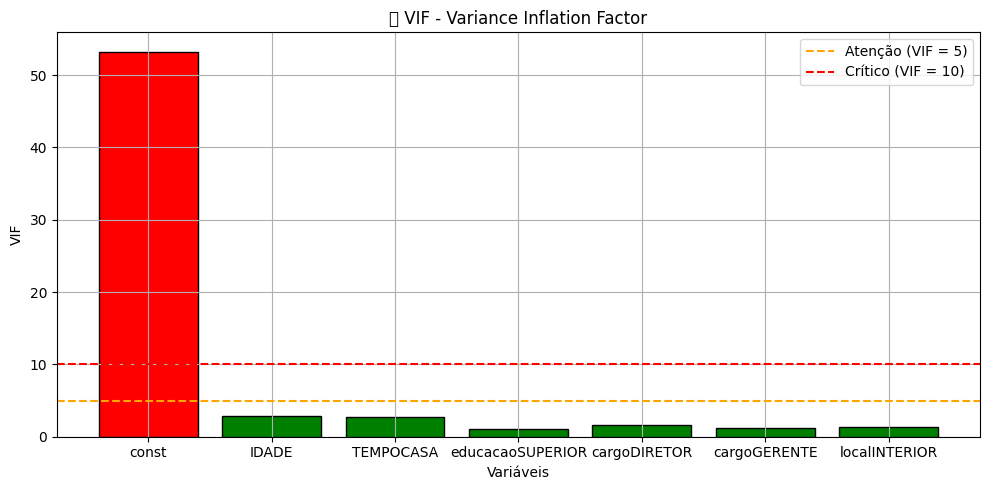

In [183]:
def verificar_vif(dataframe, variaveis):
    """
    Calcula, interpreta e plota os VIFs para detectar multicolinearidade.
    """
    print("📊 Verificando Multicolinearidade com VIF\n")

    # Adiciona constante (intercepto)
    X = dataframe[variaveis]
    X_const = sm.add_constant(X)

    # Calcula o VIF
    vif_dados = pd.DataFrame()
    vif_dados['Variável'] = X_const.columns
    vif_dados['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

    # Mostra resultados com interpretação textual
    for _, row in vif_dados.iterrows():
        var = row['Variável']
        vif = row['VIF']
        if vif < 5:
            status = "✅ Sem multicolinearidade"
        elif 5 <= vif <= 10:
            status = "⚠️ Moderada — atenção!"
        else:
            status = "🚨 Forte — problema sério!"
        print(f"{var}: VIF = {vif:.2f} → {status}")

    # Cores para o gráfico
    cores = vif_dados['VIF'].apply(
        lambda x: 'green' if x < 5 else ('orange' if x <= 10 else 'red')
    )

    # Gráfico
    plt.figure(figsize=(10, 5))
    bars = plt.bar(vif_dados['Variável'], vif_dados['VIF'], color=cores, edgecolor='black')
    plt.axhline(5, color='orange', linestyle='--', label='Atenção (VIF = 5)')
    plt.axhline(10, color='red', linestyle='--', label='Crítico (VIF = 10)')
    plt.title("📊 VIF - Variance Inflation Factor")
    plt.ylabel("VIF")
    plt.xlabel("Variáveis")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return vif_dados

variaveis = ['IDADE', 'TEMPOCASA', 'educacaoSUPERIOR', 'cargoDIRETOR', 'cargoGERENTE', 'localINTERIOR']
vif_resultado = verificar_vif(df, variaveis)

In [ ]:
# pagina 157 - Livro: Tecnicas de Machine Learning

# FORWARD
def forward_selection(data, target, threshold_in=0.05):
    inicial = []
    variaveis = data.columns.tolist()
    while True:
        candidatos = list(set(variaveis) - set(inicial))
        novo_pval = pd.Series(index=candidatos, dtype=float)

        for var in candidatos:
            modelo = sm.OLS(target, sm.add_constant(data[inicial + [var]])).fit()
            novo_pval[var] = modelo.pvalues[var]

        if novo_pval.empty:
            break

        min_p = novo_pval.min()
        if min_p < threshold_in:
            melhor = novo_pval.idxmin()
            inicial.append(melhor)
        else:
            break

    modelo_final = sm.OLS(target, sm.add_constant(data[inicial])).fit()
    return modelo_final, inicial

# BACKWARD
def backward_elimination(data, target, threshold_out=0.05):
    variaveis = data.columns.tolist()
    while True:
        modelo = sm.OLS(target, sm.add_constant(data[variaveis])).fit()
        pvalores = modelo.pvalues.iloc[1:]  # Ignora o intercepto
        max_p = pvalores.max()
        if max_p > threshold_out:
            pior = pvalores.idxmax()
            variaveis.remove(pior)
        else:
            break
    modelo_final = sm.OLS(target, sm.add_constant(data[variaveis])).fit()
    return modelo_final, variaveis

# STEPWISE
def stepwise_selection(data, target, threshold_in=0.05, threshold_out=0.05):
    included = []
    while True:
        # Forward
        excluidas = list(set(data.columns) - set(included))
        novo_pval = pd.Series(index=excluidas, dtype=float)
        for col in excluidas:
            modelo = sm.OLS(target, sm.add_constant(data[included + [col]])).fit()
            novo_pval[col] = modelo.pvalues[col]

        if not novo_pval.empty and novo_pval.min() < threshold_in:
            melhor = novo_pval.idxmin()
            included.append(melhor)

        # Backward
        modelo = sm.OLS(target, sm.add_constant(data[included])).fit()
        pvalores = modelo.pvalues.iloc[1:]
        max_p = pvalores.max()
        if max_p > threshold_out:
            pior = pvalores.idxmax()
            included.remove(pior)
        else:
            break

    modelo_final = sm.OLS(target, sm.add_constant(data[included])).fit()
    return modelo_final, included


In [173]:
def comparar_modelos(modelos_dict):
    """
    Recebe um dicionário com modelos e mostra R², AIC e variáveis usadas.
    """
    print("📈 Comparação entre os Modelos\n")
    resultados = []

    for nome, (modelo, variaveis) in modelos_dict.items():
        resultados.append({
            "Método": nome,
            "R²": round(modelo.rsquared, 4),
            "AIC": round(modelo.aic, 2),
            "Variáveis": len(variaveis),
            "Lista de variáveis": variaveis
        })

    df_resultados = pd.DataFrame(resultados).sort_values(by="AIC")
    print(df_resultados)

    # Exportar para CSV (opcional)
    df_resultados.to_csv("comparacao_modelos.csv", index=False)
    print("\n📂 Resultado salvo como: comparacao_modelos.csv")

    return df_resultados


In [174]:
# Definindo os dados
X = df[['IDADE', 'TEMPOCASA', 'educacaoSUPERIOR', 'cargoDIRETOR', 'cargoGERENTE', 'localINTERIOR']]
y = df['SALARIO']

# Rodando os métodos
modelo_forward, vars_forward = forward_selection(X, y)
modelo_backward, vars_backward = backward_elimination(X, y)
modelo_stepwise, vars_stepwise = stepwise_selection(X, y)

# Juntando para comparar
modelos = {
    "Forward": (modelo_forward, vars_forward),
    "Backward": (modelo_backward, vars_backward),
    "Stepwise": (modelo_stepwise, vars_stepwise)
}

# Comparando
comparar_modelos(modelos)


📈 Comparação entre os Modelos

     Método      R²      AIC  Variáveis  \
0   Forward  0.8227  1163.23          4   
1  Backward  0.8227  1163.23          4   
2  Stepwise  0.6907  1201.19          1   

                               Lista de variáveis  
0  [TEMPOCASA, cargoDIRETOR, cargoGERENTE, IDADE]  
1  [IDADE, TEMPOCASA, cargoDIRETOR, cargoGERENTE]  
2                                     [TEMPOCASA]  

📂 Resultado salvo como: comparacao_modelos.csv


,Método,R²,AIC,Variáveis,Lista de variáveis
0,Forward,0.8227,1163.23,4,"[TEMPOCASA, cargoDIRETOR, cargoGERENTE, IDADE]"
1,Backward,0.8227,1163.23,4,"[IDADE, TEMPOCASA, cargoDIRETOR, cargoGERENTE]"
2,Stepwise,0.6907,1201.19,1,[TEMPOCASA]


In [113]:
for nome, (modelo, variaveis) in modelos.items():
    print(f"\n🔹 {nome.upper()} — Coeficientes:")
    print(modelo.summary().tables[1])


🔹 FORWARD — Coeficientes:
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3696.4345    292.911     12.620      0.000    3112.796    4280.073
TEMPOCASA       72.3398      9.001      8.037      0.000      54.406      90.274
cargoDIRETOR   673.4042    137.882      4.884      0.000     398.667     948.141
cargoGERENTE   326.8592     93.630      3.491      0.001     140.298     513.420
IDADE           19.9319      7.347      2.713      0.008       5.292      34.572

🔹 BACKWARD — Coeficientes:
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3696.4345    292.911     12.620      0.000    3112.796    4280.073
IDADE           19.9319      7.347      2.713      0.008       5.292      34.572
TEMPOCASA       72.3398      9.001      8.037      0.0

In [175]:
def mostrar_formula(modelo_forward, variaveis):
    """
    Gera a fórmula da regressão linear em forma de string legível.
    """
    coef = modelo_forward.params
    formula = f"{modelo_forward.model.endog_names} = "

    for i, var in enumerate(coef.index):
        valor = coef[var]
        sinal = "+" if valor >= 0 and i > 0 else ""
        formula += f"{sinal}{valor:.2f}*{var} " if var != 'const' else f"{valor:.2f} "

    print("📐 Fórmula da regressão:")
    print(formula)


mostrar_formula(modelo_forward, vars_forward)


📐 Fórmula da regressão:
SALARIO = 3696.43 +72.34*TEMPOCASA +673.40*cargoDIRETOR +326.86*cargoGERENTE +19.93*IDADE 


In [ ]:
# PREVISÃO

# 1. Criar novo perfil para previsão
novo_exemplo = pd.DataFrame({
    'IDADE': [30],
    'TEMPOCASA': [5],
    'educacaoSUPERIOR': [0],      # não entrou no modelo, mas precisa estar se usou sm.add_constant
    'cargoDIRETOR': [1],
    'cargoGERENTE': [0],
    'localINTERIOR': [0]          # também não entrou no modelo
})

# 2. Filtrar apenas as variáveis usadas no modelo_forward
novo_input = novo_exemplo[vars_forward]

# 3. Adicionar constante (como foi feito no treino do modelo)
novo_input = sm.add_constant(novo_input, has_constant='add')

# 4. Prever com intervalo de predição 95%
previsao = modelo_forward.get_prediction(novo_input)
resultado = previsao.summary_frame(alpha=0.05)  # 95% de confiança

# 5. Mostrar resultado
print("📈 Salário previsto:", round(resultado['mean'][0], 2))
print("🔒 Intervalo de predição (95%): de", round(resultado['obs_ci_lower'][0], 2),
      "até", round(resultado['obs_ci_upper'][0], 2))


📈 Salário previsto: 5329.5
🔒 Intervalo de predição (95%): de 4498.18 até 6160.82


In [177]:
# 1. Criar vários perfis para previsão
novos_dados = pd.DataFrame([
    {'IDADE': 30, 'TEMPOCASA': 5, 'educacaoSUPERIOR': 0, 'cargoDIRETOR': 1, 'cargoGERENTE': 0, 'localINTERIOR': 0},  # Diretor
    {'IDADE': 25, 'TEMPOCASA': 2, 'educacaoSUPERIOR': 1, 'cargoDIRETOR': 0, 'cargoGERENTE': 1, 'localINTERIOR': 1},  # Gerente
    {'IDADE': 22, 'TEMPOCASA': 1, 'educacaoSUPERIOR': 0, 'cargoDIRETOR': 0, 'cargoGERENTE': 0, 'localINTERIOR': 0},  # Auxiliar
    {'IDADE': 40, 'TEMPOCASA': 15, 'educacaoSUPERIOR': 1, 'cargoDIRETOR': 1, 'cargoGERENTE': 0, 'localINTERIOR': 1}   # Diretor experiente
])

# 2. Selecionar apenas as variáveis usadas no modelo
novos_input = novos_dados[vars_forward]

# 3. Adicionar constante
novos_input = sm.add_constant(novos_input)

# 4. Prever com intervalo de confiança 95%
previsoes = modelo_forward.get_prediction(novos_input)
resultado = previsoes.summary_frame(alpha=0.05)

# 5. Juntar as previsões com os perfis originais
resultado_final = novos_dados.copy()
resultado_final['Salário_Previsto'] = resultado['mean']
resultado_final['Limite_Inf'] = resultado['obs_ci_lower']
resultado_final['Limite_Sup'] = resultado['obs_ci_upper']

# 6. Mostrar resultado final
print(resultado_final)


   IDADE  TEMPOCASA  educacaoSUPERIOR  cargoDIRETOR  cargoGERENTE  \
0     30          5                 0             1             0   
1     25          2                 1             0             1   
2     22          1                 0             0             0   
3     40         15                 1             1             0   

   localINTERIOR  Salário_Previsto   Limite_Inf   Limite_Sup  
0              0       5329.495902  4498.176397  6160.815408  
1              1       4666.271881  3874.935916  5457.607846  
2              0       4207.277127  3411.758728  5002.795525  
3              1       6252.212923  5436.043809  7068.382038  
